In [20]:
import numpy as np
import pandas as pd
import chardet 

While reading this file I was faced unicodedecoder issue that's why using this code to get rid of it. 

In [21]:
with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large
df = pd.read_csv('spam.csv', encoding=result['encoding'])


In [22]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [54]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4996,ham,Esplanade lor. Where else...,NaN,NaN,NaN
2093,spam,Final Chance! Claim ur å£150 worth of discount...,NaN,NaN,NaN
2685,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN
173,ham,"Bloody hell, cant believe you forgot my surnam...",NaN,NaN,NaN
122,spam,Todays Voda numbers ending 7548 are selected t...,NaN,NaN,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Cleaning the Data


In [24]:
# dropping last 3 unnamed coloumn
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [25]:
#renaming the coloumn
df.rename(columns={'v1':'target','v2':'text'},inplace =True)

using label encoder for changing Ham and spam to number 0 and 1 


In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [27]:
df['target'] = encoder.fit_transform(df['target']) #changing the target coloumn value to 0 and 1 

In [28]:
df.sample(5)

,target,text
2961,0,"\NONE!NOWHERE IKNO DOESDISCOUNT!SHITINNIT\"""""
3243,0,Squeeeeeze!! This is christmas hug.. If u lik ...
1455,1,Summers finally here! Fancy a chat or flirt wi...
3198,0,No de.am seeing in online shop so that i asked.
600,0,Mind blastin.. No more Tsunamis will occur fro...


In [29]:
#checking if there is any null values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [30]:
df.duplicated().sum()

403

In [31]:
#removing the 403 duplicates values
df= df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [32]:
df.sample(5)
df.shape

(5169, 2)

                                                                  EDA 

In [33]:
df['target'].value_counts()   # 0 is ham 1 is spam 

target
0    4516
1     653
Name: count, dtype: int64

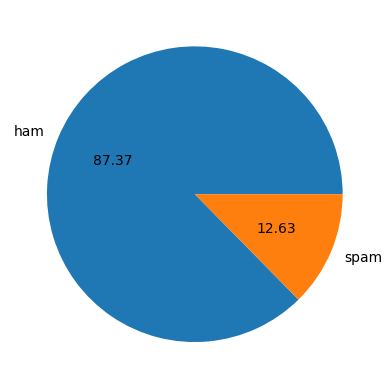

In [34]:
#representing by pychart 
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [61]:
# 88% is not ham and 13% is spam, so data is slightly imbalance 

In [63]:
#counting word alphabate and sentences in the text messages , for that creating three different coloumn and we are using 
#nltk libary of NLP to count thos things 

In [35]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BNASKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
#calculating number of character from text
df['num_characters']=df['text'].apply(len)
#df.drop(columns=['alphabates_count'],inplace =True)

In [37]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [38]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [39]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [40]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
2545,0,So are you guys asking that i get that slipper...,80,17,1
4147,1,Please call Amanda with regard to renewing or ...,160,32,3
1425,0,I'll be at mu in like &lt;#&gt; seconds,41,15,1
1010,0,Lol I would but my mom would have a fit and te...,93,21,1
5454,0,Im just wondering what your doing right now?,44,9,1


In [41]:
df[['num_characters','num_words','num_sentences']].describe()   

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()   # for ham message this the details
#the maximum number of character used is 910, maximum words is 220, maximum number of sentences is 38


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [76]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()   # for spam message this the details

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [77]:
#plotting histrogram for the both ham and spam

In [43]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

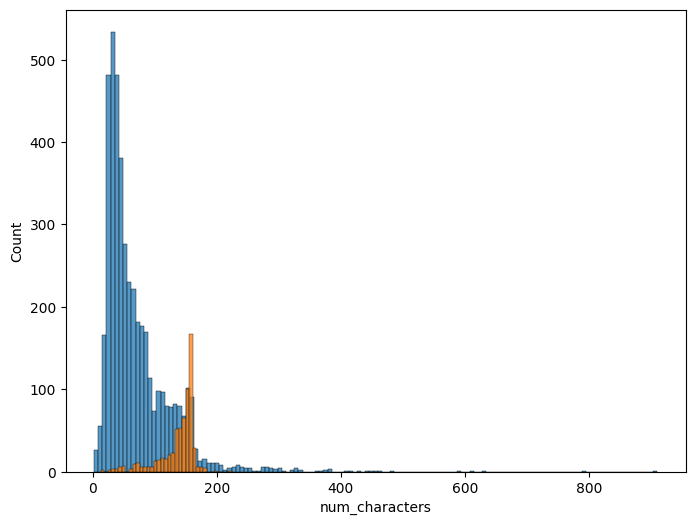

In [44]:
#character comparision between Ham and Spam Messages 
plt.figure(figsize=(8,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'])


<Axes: xlabel='num_words', ylabel='Count'>

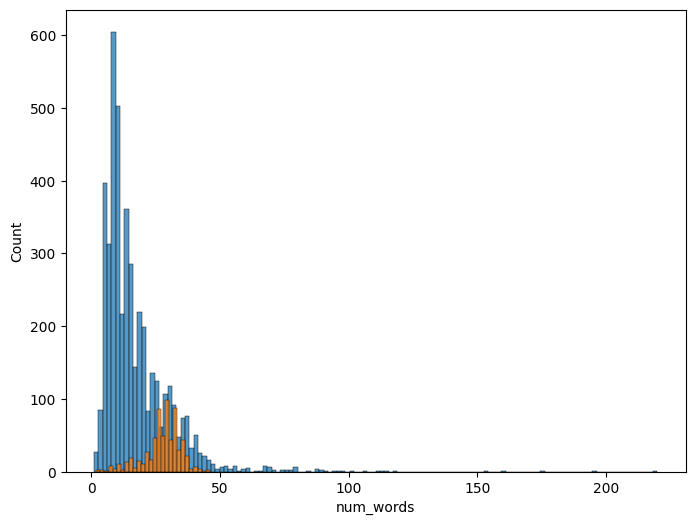

In [45]:
#character comparision between Ham and Spam Messages 
plt.figure(figsize=(8,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

<Axes: xlabel='num_sentences', ylabel='Count'>

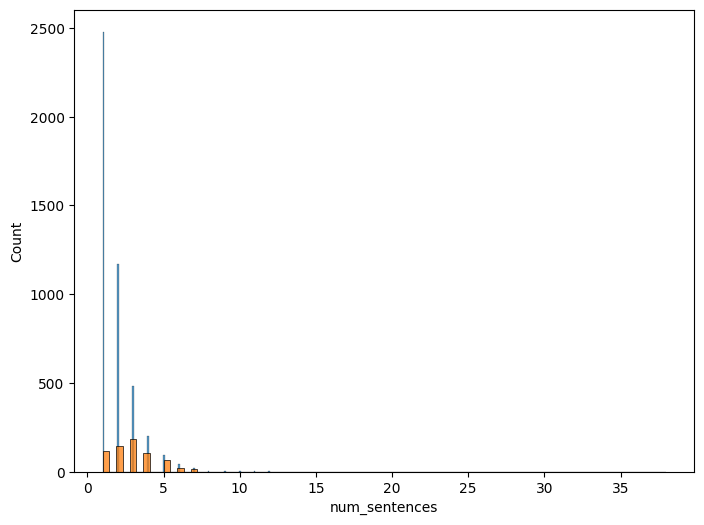

In [46]:
#character comparision between Ham and Spam Messages 
plt.figure(figsize=(8,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'])

In [68]:
#using pariplot for see the relationship between words senetences and characters 

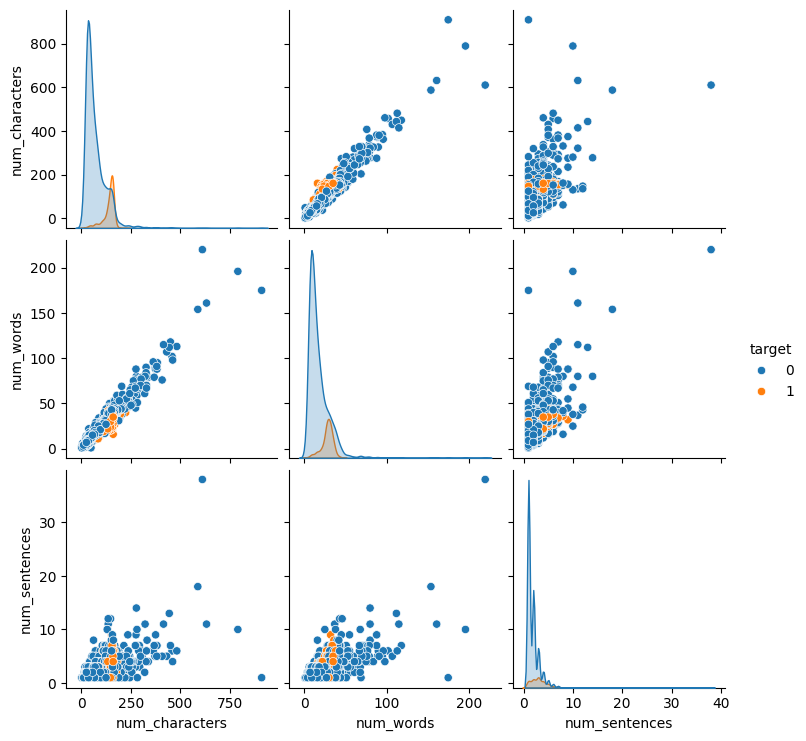

In [47]:
sns.pairplot(df,hue='target')

In [72]:
#AS we can see from the graph there are some outlier(which doesn't belongs to the cluster)

<Axes: >

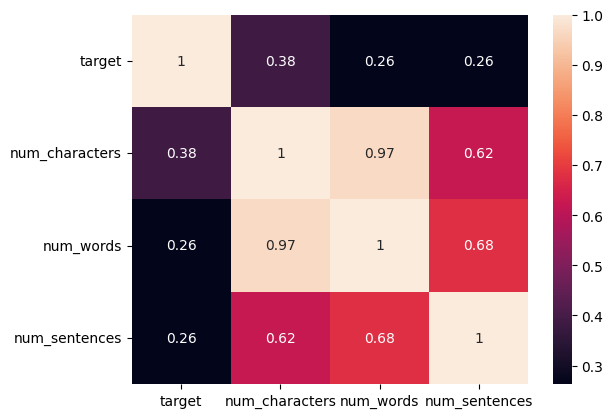

In [48]:
# to see the coeficients relationships we are using heatmap
#numeric_Only True as the data type is string and flot is required that's why 
sns.heatmap(df.corr(numeric_only=True),annot=True)
#from the heatmap we can see that there is a strong corelation between all of them so we can't keep all the coloumn for building the model, 
#number of character coloumn is 0.38 with target so we will keep that coloum only as other two coloumn value with target is less than 0.38

                                                             DATA PREPROCESSING 
                        
                       Lower Case, Tokenization, Remove Special Character, Remove Stop words and puntuations,stemming
                                                    

In [49]:
def transform_text(text):
    text=text.lower()   #using for lowering the characters
    text=nltk.word_tokenize(text) #using for tokenize the characters

    #Removing special Characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
 #this is using to remove all the stop words and puntuation from the text
    text =y[:] # initialize the output to y and then cleaning the y to check whether or not the stop words present in the text,([:] it's clonning as List is a mutable data type so we can't copt it directly)
    y.clear()
    for i in  text:
        if i not in stopwords.words('English') and i not in string.punctuation:
            y.append(i)

#for stemming
    text =y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)        

In [52]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat')   # from the output we can see that the '! and ? ' is removed 

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [51]:
#for Removing stop words and puntuation using nltk libary and string puntuation feature.
import string
#string.punctuation
from nltk.corpus import stopwords
#nltk.download("stopwords") #downloading the stopwords libary 
#stopwords.words('English')
#for stemming 
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()  #(creating object)
#ps.stem('danceing')

In [55]:
df['transformed_text'] = df['text'].apply(transform_text)

In [99]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


                                                           creating wordcloud

In [56]:
from wordcloud import WordCloud
wc= WordCloud(width=800,height=800,min_font_size=8,background_color='white')

In [57]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))   # generating all the spam key wpords 

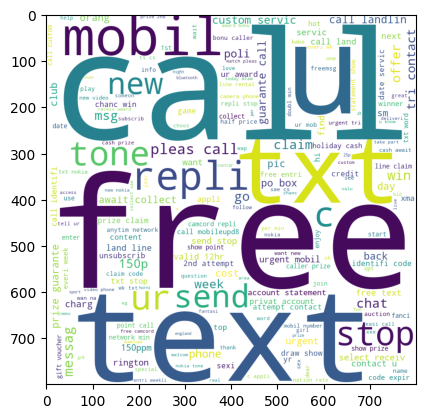

In [58]:
plt.imshow(spam_wc)

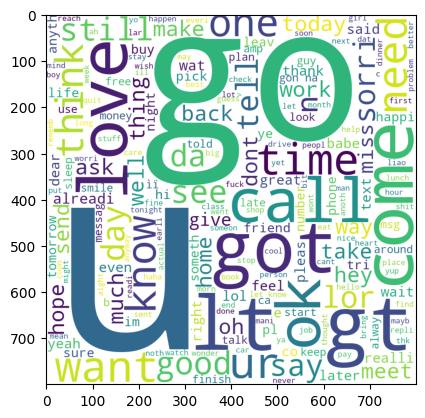

In [205]:
Ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))   # generating all the Ham key wpords 
plt.imshow(Ham_wc)

In [59]:
#for fetching most common words from the data set that are used in the spam messages 

spam_corpus=[] #Creating a empty list
for msg in df[df['target']==1]['transformed_text'].tolist():  #the spam messages trun into a list
    for word in msg.split():     #splitting the words
        spam_corpus.append(word)  #adding into the list
len(spam_corpus)    

9939

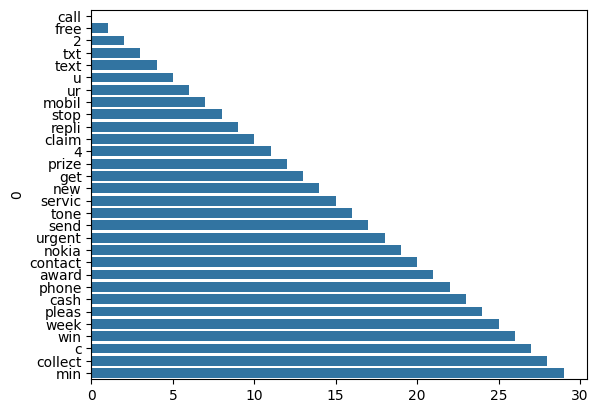

In [60]:
#creating a dataframe with top 30 words of the spam messages, and then plotting it with the help of seaborn libary 
from collections import Counter   
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])  
#plt.xticks(rotation='vertical')
plt.show()

In [103]:
#for fetching most common words from the data set that are used in the Ham messages 

Ham_corpus=[] #Creating a empty list
for msg in df[df['target']==0]['transformed_text'].tolist():  #the Ham messages trun into a list
    for word in msg.split():     #splitting the words
        Ham_corpus.append(word)  #adding into the list
        
len(Ham_corpus)

35404

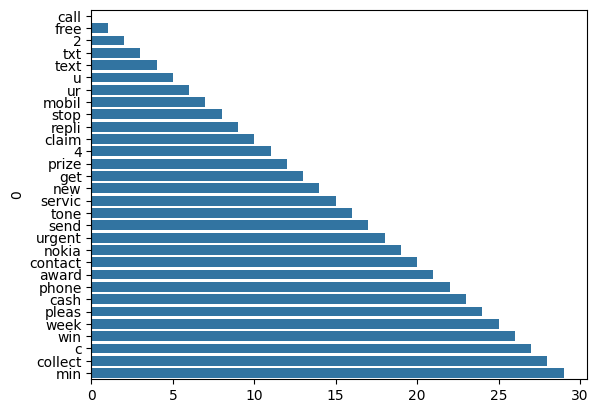

In [61]:
#creating a dataframe with top 30 words of the Ham messages, and then plotting it with the help of seaborn libary 
from collections import Counter   
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])  
#plt.xticks(rotation='vertical')
plt.show()

                                                      MODEL BUILDING (USING NAIVE BAYES)

In [62]:
# we have to Vectorize the data , as the input coloumn is not a numeric coloumn we have to change it into numeric coloumn using 
#on of the NLP method Bag_of_words.
#from sklearn.feature_extraction.text import CountVectorizer
#Now we will try same Model Naive Bayes for TFIDF Vectorization 
from sklearn.feature_extraction.text import TfidfVectorizer
#cv = CountVectorizer() #creating object of CountVectorizer
cv = TfidfVectorizer(max_features=3000)


In [63]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [170]:
x.shape    #5169 sms,  #6708 words or  #after putting max_features=3000 the word count will change to 3000

(5169, 3000)

In [65]:
y = df['target'].values

In [66]:
y


array([0, 0, 1, ..., 0, 0, 0])

In [68]:
#train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [70]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
# as we can se the precesion value is quite bad so gnb model doesn't work that good 

In [71]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
# as we can see for mnb model working is quite good 

In [72]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [346]:
# and for bnb model it's performing the best than the other(for Wordtovec method)
#and for mnb model it's performing the best than the other(for TFIDF method)

                                           for wordtovec vectorization #bnb>mnb>gnb
                                           for TFIDF vectorization method #mnb>bnb>gnb
we will use TFIDF method as the precesion is best for this one for MultinomialNB, as there are quite imbalance in the data so more than accuracy precision matter so going for the mnb method of TFIDF 

                        Compareing the Naive bayes model with other model to check whether it's the best fit model or not 
                                

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [4]:
#creating objects for all the imported model

In [74]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [126]:
#creating a dictionary of those model

In [75]:
clfs ={ 'SVC' : svc,
        'KNC' : knc,
        'MNB' : mnb,
        'DTC' : dtc,
        'LRC' : lrc,
        'RFC' : rfc,
        'ABC' : abc,
        'BC' : bc,
        'ETC' : etc,
        'GBDT' : gbdt,
        'XGB' : xgb}

In [76]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision 

In [77]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [78]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
    print("For", name)
    print("Accuracy", current_accuracy)
    print("precision",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
    

For SVC
Accuracy 0.9758220502901354
precision 0.9747899159663865
For KNC
Accuracy 0.9052224371373307
precision 1.0
For MNB
Accuracy 0.9709864603481625
precision 1.0
For DTC
Accuracy 0.9303675048355899
precision 0.8173076923076923
For LRC
Accuracy 0.9584139264990329
precision 0.9702970297029703
For RFC
Accuracy 0.9758220502901354
precision 0.9829059829059829


C:\Users\BNASKAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For ABC
Accuracy 0.960348162475822
precision 0.9292035398230089
For BC
Accuracy 0.9584139264990329
precision 0.8682170542635659
For ETC
Accuracy 0.9748549323017408
precision 0.9745762711864406
For GBDT
Accuracy 0.9468085106382979
precision 0.9191919191919192
For XGB
Accuracy 0.9671179883945842
precision 0.9262295081967213


In [79]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [80]:
performance_df

,Algorithm,Accuracy,Precision
1,KNC,0.905222,1.000000
2,MNB,0.970986,1.000000
5,RFC,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LRC,0.958414,0.970297
6,ABC,0.960348,0.929204
10,XGB,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BC,0.958414,0.868217


In [152]:
#from the upper model we can see RFC and MNB those two model are the best performing Algorithm.


In [155]:
#now showing the comparision graph using seaborn and pd melt() 
performance_df1 = pd.melt(performance_df,id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,KNC,Accuracy,0.900387
1,MNB,Accuracy,0.959381
2,RFC,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,ABC,Accuracy,0.961315
6,XGB,Accuracy,0.972921
7,LRC,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BC,Accuracy,0.958414


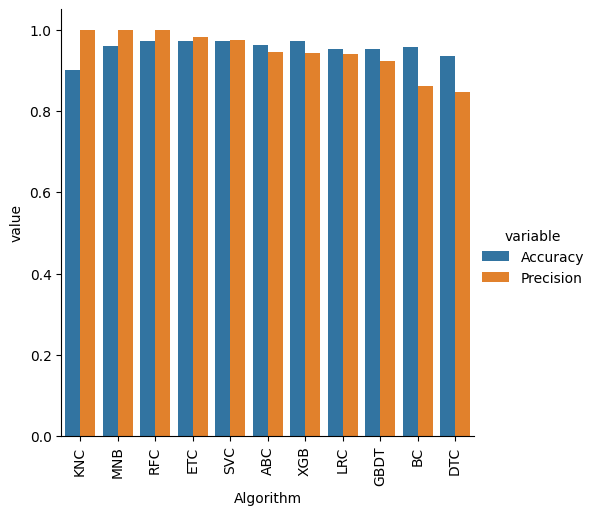

In [164]:
sns.catplot(x='Algorithm',y='value',hue ='variable',data=performance_df1,kind='bar',height=5)
plt.xticks(rotation ='vertical')
plt.show()

                                                                Model Improvement 
                                                                      

In [185]:
#1. Chnaging the max feature parameter of the TFIDF 

In [186]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_300':accuracy_scores,'Precision_max_ft_300':precision_scores})

In [187]:
temp_df

,Algorithm,Accuracy_max_ft_300,Precision_max_ft_300
0,SVC,0.975822,0.974790
1,KNC,0.905222,1.000000
2,MNB,0.970986,1.000000
3,DTC,0.930368,0.817308
4,LRC,0.958414,0.970297
5,RFC,0.975822,0.982906
6,ABC,0.960348,0.929204
7,BC,0.958414,0.868217
8,ETC,0.974855,0.974576
9,GBDT,0.946809,0.919192


In [188]:
performance_df.merge(temp_df,on='Algorithm')   # this will showcase the difference between before applying
#the max_feature and after applying the max_feature parameter

,Algorithm,Accuracy,Precision,Accuracy_max_ft_300,Precision_max_ft_300
0,KNC,0.900387,1.000000,0.905222,1.000000
1,MNB,0.959381,1.000000,0.970986,1.000000
2,RFC,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,ABC,0.961315,0.945455,0.960348,0.929204
6,XGB,0.972921,0.943548,0.967118,0.926230
7,LRC,0.951644,0.940000,0.958414,0.970297
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BC,0.958414,0.862595,0.958414,0.868217


In [190]:
#using voting classifier for improving the performance ,
#voting classifier is nothing but combination of the best performing model and usually it's gives us better output than single model

In [9]:
from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid', gamma=1, probability=True)
mnb= MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)


In [194]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting ='soft')

In [195]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1, kernel='sigmoid', probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [198]:
y_pred=voting.predict(x_test)
print("accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

accuracy 0.9816247582205029
precision 0.9917355371900827


In [199]:
#this model will also not work as the precision decreses to 99% so till time Naive Bayes is the best performing one 

In [201]:
#Applying Stacking method (it's basically quite similar to voting but te=he only difference is here for each model we will give
#specific weightage (here we use RandomForestClassifier)

In [83]:
from sklearn.ensemble import StackingClassifier
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [84]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [85]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

accuracy 0.9816247582205029
precision 0.9612403100775194


In [88]:
#so here also the accuracy is not upto the mark, so from all of this we can conclude only "Max_featurte is the only thing that
#improved the model performance.  # I have also tried to apply scale the y value but that too was not have that much impact on 
#accuaracy and precision.